# Imports

In [1]:
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , mean_absolute_percentage_error

import tensorflow as tf
from tensorflow.keras.layers import LSTM , Dropout , Dense
from tensorflow.keras.models import Sequential
import pandas_datareader.data as web
import datetime

import datetime
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
start = datetime.datetime(2011 , 1 , 1)
end= datetime.datetime.now()
df = web.DataReader('^NSEI' , 'yahoo' , start , end)
df.drop(['Volume' , 'Adj Close'] , axis=1 , inplace=True)

data = df.copy()

In [3]:
df['Close'].loc['2019-12':'2020-05'].head(40)

Date
2019-12-02    12048.200195
2019-12-03    11994.200195
2019-12-04    12043.200195
2019-12-05    12018.400391
2019-12-06    11921.500000
2019-12-09    11937.500000
2019-12-10    11856.799805
2019-12-11    11910.150391
2019-12-12    11971.799805
2019-12-13    12086.700195
2019-12-16    12053.950195
2019-12-17    12165.000000
2019-12-18    12221.650391
2019-12-19    12259.700195
2019-12-20    12271.799805
2019-12-23    12262.750000
2019-12-24    12214.549805
2019-12-26    12126.549805
2019-12-27    12245.799805
2019-12-30    12255.849609
2019-12-31    12168.450195
2020-01-01    12182.500000
2020-01-02    12282.200195
2020-01-03    12226.650391
2020-01-06    11993.049805
2020-01-07    12052.950195
2020-01-08    12025.349609
2020-01-09    12215.900391
2020-01-10    12256.799805
2020-01-13    12329.549805
2020-01-14    12362.299805
2020-01-15    12343.299805
2020-01-16    12355.500000
2020-01-17    12352.349609
2020-01-20    12224.549805
2020-01-21    12169.849609
2020-01-22    12106.900

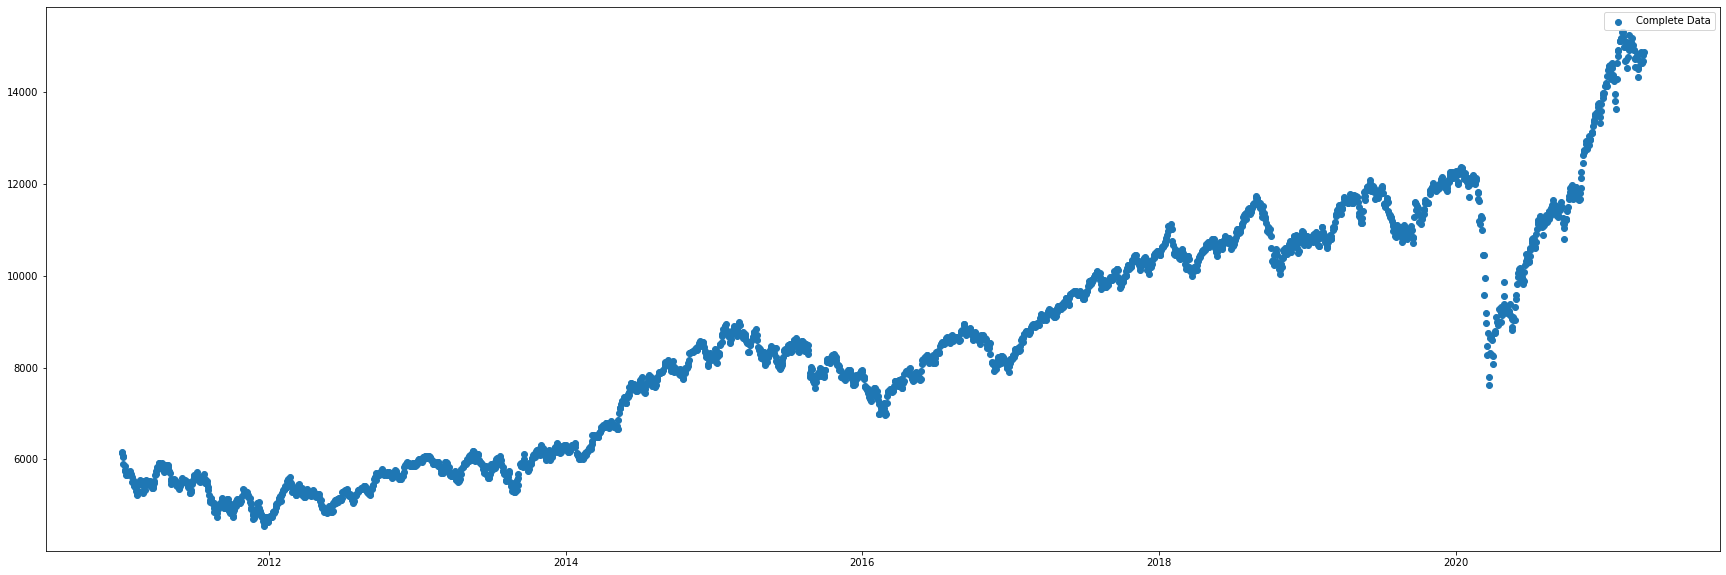

In [4]:
plt.figure(figsize=(30 , 10))
plt.scatter(df.index , df['Close'] , label='Complete Data')
plt.legend()
plt.show()

In [7]:
# Training and testing data
train_size = int(len(data) *0.80)
train = data[:train_size]
test = data[train_size :]

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_close = scaler.fit_transform(np.array(train['Close']).reshape(-1,1))

In [9]:
scaled_open = scaler.transform(np.array(train['Open']).reshape(-1,1))
scaled_high = scaler.transform(np.array(train['High']).reshape(-1,1))
scaled_low = scaler.transform(np.array(train['Low']).reshape(-1,1))

In [10]:
open_list = []
close_list = []
high_list = []
low_list = []
for i in range(len(scaled_open)):
    open_list.append(scaled_open[i])
    high_list.append(scaled_high[i])
    low_list.append(scaled_low[i])
    close_list.append( scaled_close[i])

In [11]:
open_arr = np.array(open_list).reshape(-1,1)
high_arr = np.array(high_list).reshape(-1,1)
low_arr = np.array(low_list).reshape(-1,1)
close_arr = np.array(close_list).reshape(-1,1)

In [12]:
scaled_data = pd.DataFrame(open_arr , columns=['Open'])

In [13]:
scaled_data['High'] = high_arr
scaled_data['Low'] = low_arr
scaled_data['Close'] = close_arr

In [14]:
scaled_train = np.array(scaled_data)

In [15]:
X_train = []
y_train = []

for x in range(60,len(scaled_train)-1):
    temp = []
    for i in scaled_train[x-60 :x,]:
        temp.append(i[0] )
        temp.append(i[1])
        temp.append( i[2])
        temp.append(i[3])
        
    X_train.append(temp)
    
    y_train.append(scaled_train[x+1][3])

In [16]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [18]:
test_scaled_close = scaler.transform(np.array(test['Close']).reshape(-1,1))
test_scaled_open = scaler.transform(np.array(test['Open']).reshape(-1,1))
test_scaled_high = scaler.transform(np.array(test['High']).reshape(-1,1))
test_scaled_low = scaler.transform(np.array(test['Low']).reshape(-1,1))

In [19]:
open_list = []
close_list = []
high_list = []
low_list = []
for i in range(len(test_scaled_open)):
    open_list.append(test_scaled_open[i])
    high_list.append(test_scaled_high[i])
    low_list.append(test_scaled_low[i])
    close_list.append( test_scaled_close[i])

In [20]:
open_arr = np.array(open_list).reshape(-1,1)
high_arr = np.array(high_list).reshape(-1,1)
low_arr = np.array(low_list).reshape(-1,1)
close_arr = np.array(close_list).reshape(-1,1)

In [21]:
scaled_data = pd.DataFrame(open_arr , columns=['Open'])
scaled_data['High'] = high_arr
scaled_data['Low'] = low_arr
scaled_data['Close'] = close_arr

In [24]:
scaled_test = np.array(scaled_data)

In [25]:
X_test = []
y_test = []

for x in range(60,len(scaled_test)-1):
    temp = []
    for i in scaled_test[x-60 :x,]:
        temp.append(i[0] )
        temp.append(i[1])
        temp.append( i[2])
        temp.append(i[3])
        
    X_test.append(temp)
    
    y_test.append(scaled_test[x+1][3])

In [26]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [27]:
X_train = X_train.reshape((-1,240 , 1))
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape((-1,240,1))
y_train = y_train.reshape(-1,1)

In [28]:
lstm = Sequential()
lstm.add(LSTM(250 ,return_sequences=True ,  input_shape=(240,1)))
lstm.add(LSTM(250 , return_sequences = True))
lstm.add(LSTM(250))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error' , optimizer='adam' , metrics=['accuracy','mse'])

In [29]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 240, 250)          252000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 240, 250)          501000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 250)               501000    
_________________________________________________________________
dense (Dense)                (None, 1)                 251       
Total params: 1,254,251
Trainable params: 1,254,251
Non-trainable params: 0
_________________________________________________________________


In [32]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='./models/lstmYahoo/',
                                              save_weights_only=True,
                                              verbose=1)

In [38]:
lstm.fit(X_train ,y_train , validation_data=(X_test,y_test) ,epochs=100 , batch_size=64 ,verbose=1 , callbacks=[callback] )

Epoch 1/100
31/31 [==============================] - 74s 2s/step - loss: 9.5949e-04 - accuracy: 0.0010 - mse: 9.5949e-04 - val_loss: 0.0057 - val_accuracy: 0.0000e+00 - val_mse: 0.0057

Epoch 00001: saving model to ./models/lstmYahoo/
Epoch 2/100
31/31 [==============================] - 72s 2s/step - loss: 3.9469e-04 - accuracy: 0.0010 - mse: 3.9469e-04 - val_loss: 0.0028 - val_accuracy: 0.0000e+00 - val_mse: 0.0028

Epoch 00002: saving model to ./models/lstmYahoo/
Epoch 3/100
31/31 [==============================] - 74s 2s/step - loss: 3.5718e-04 - accuracy: 0.0010 - mse: 3.5718e-04 - val_loss: 0.0022 - val_accuracy: 0.0000e+00 - val_mse: 0.0022

Epoch 00003: saving model to ./models/lstmYahoo/
Epoch 4/100
31/31 [==============================] - 73s 2s/step - loss: 3.5851e-04 - accuracy: 0.0010 - mse: 3.5851e-04 - val_loss: 0.0021 - val_accuracy: 0.0000e+00 - val_mse: 0.0021

Epoch 00004: saving model to ./models/lstmYahoo/
Epoch 5/100
31/31 [==============================] - 74s 2s/


Epoch 00035: saving model to ./models/lstmYahoo/
Epoch 36/100
31/31 [==============================] - 71s 2s/step - loss: 3.1877e-04 - accuracy: 0.0010 - mse: 3.1877e-04 - val_loss: 0.0015 - val_accuracy: 0.0000e+00 - val_mse: 0.0015

Epoch 00036: saving model to ./models/lstmYahoo/
Epoch 37/100
31/31 [==============================] - 72s 2s/step - loss: 3.2840e-04 - accuracy: 0.0010 - mse: 3.2840e-04 - val_loss: 0.0014 - val_accuracy: 0.0000e+00 - val_mse: 0.0014

Epoch 00037: saving model to ./models/lstmYahoo/
Epoch 38/100
31/31 [==============================] - 72s 2s/step - loss: 3.3183e-04 - accuracy: 0.0010 - mse: 3.3183e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00 - val_mse: 0.0016

Epoch 00038: saving model to ./models/lstmYahoo/
Epoch 39/100
31/31 [==============================] - 71s 2s/step - loss: 3.2845e-04 - accuracy: 0.0010 - mse: 3.2845e-04 - val_loss: 0.0017 - val_accuracy: 0.0000e+00 - val_mse: 0.0017

Epoch 00039: saving model to ./models/lstmYahoo/
Epoch 

In [40]:
lstm.save('./models/lstmYahoo/lstmyahoo.h5')

In [41]:
training_predictions = lstm.predict(X_train)

In [42]:
print('Mean Squared Error : {}'.format(mean_squared_error(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) ,scaler.inverse_transform(training_predictions) )))
print('Mean Absolute Error : {}'.format(mean_absolute_error(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) ,scaler.inverse_transform(training_predictions))))

Mean Squared Error : 18835.222535999925
Mean Absolute Error : 106.22779323973856


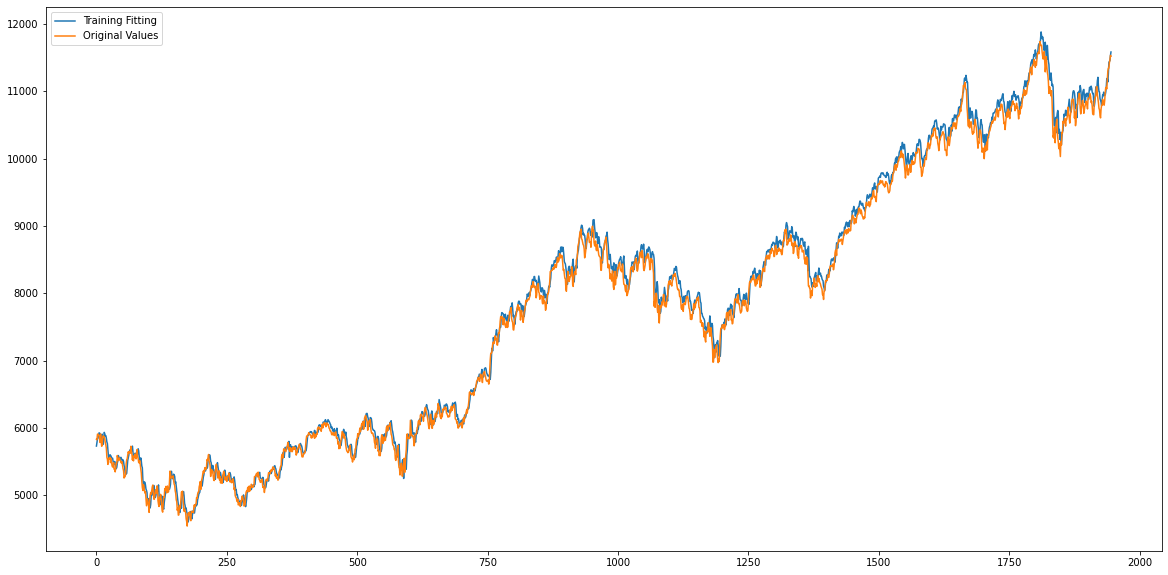

In [43]:
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(training_predictions) , label='Training Fitting')
plt.plot(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) ,label='Original Values')
plt.legend()
plt.show()

In [44]:
preds = lstm.predict(X_test)

In [45]:
print('Mean Squared Error : {}'.format(mean_squared_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,scaler.inverse_transform(preds) )))
print('Mean Absolute Error : {}'.format(mean_absolute_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,scaler.inverse_transform(preds))))

Mean Squared Error : 69342.47349874506
Mean Absolute Error : 195.32101558071156


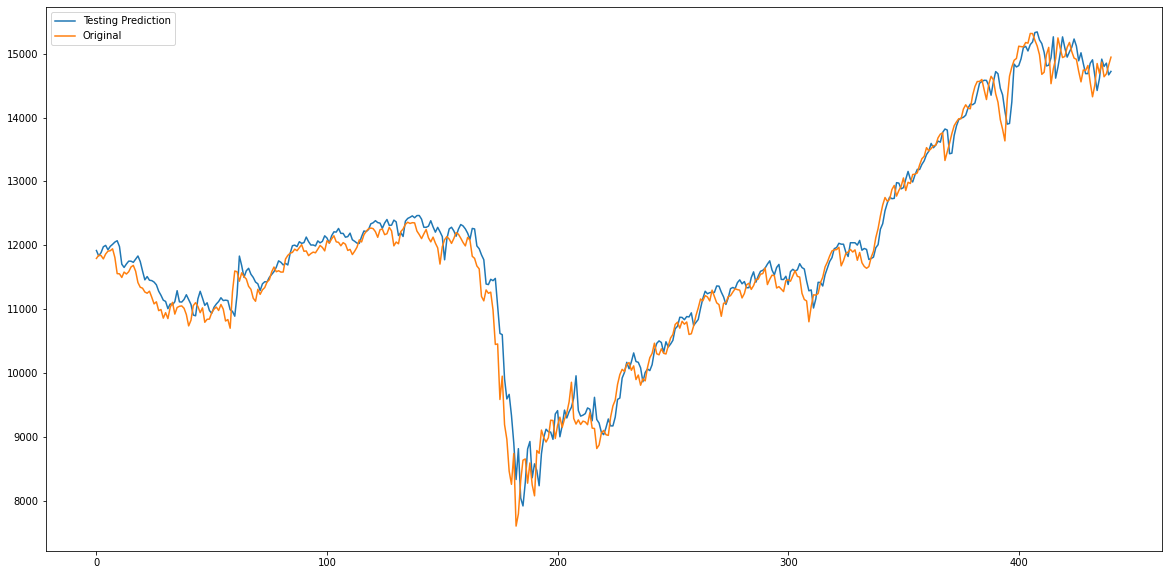

In [46]:
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(preds) , label='Testing Prediction')
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,label='Original')
plt.legend()
plt.show()

In [47]:
scaled_original = scaler.inverse_transform(np.array(y_test).reshape(-1,1))
scaled_lstm10 = scaler.inverse_transform(preds)

In [48]:
scaled_original = scaled_original.reshape(1,-1).tolist()
scaled_lstm10  = scaled_lstm10.reshape(1,-1).tolist()

In [49]:
index = test[61:].index

In [50]:
data = {'Original':scaled_original[0] ,
        'last 10 years model prediction': scaled_lstm10[0]}

In [51]:
df = pd.DataFrame(data=data , index =index)

In [60]:
df.loc['2021-01':]

,Original,last 10 years model prediction
Date,,
2021-01-04,14132.900391,14003.275391
2021-01-05,14199.500000,14036.240234
2021-01-06,14146.250000,14147.371094
2021-01-07,14137.349609,14210.018555
2021-01-08,14347.250000,14200.517578
...,...,...
2021-04-01,14867.349609,14913.712891
2021-04-05,14637.799805,14798.993164
2021-04-06,14683.500000,14850.529297


In [61]:
df.to_csv('./yahooTraining.csv')

In [53]:
print('Mean Absolute Percentage Error : {}'.format(mean_absolute_percentage_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,scaler.inverse_transform(preds) )))

Mean Absolute Percentage Error : 0.01748055368232875


In [55]:
print('Mean Absolute Percentage Error : {}'.format(mean_absolute_percentage_error(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) ,scaler.inverse_transform(training_predictions) )))

Mean Absolute Percentage Error : 0.013978968692187382


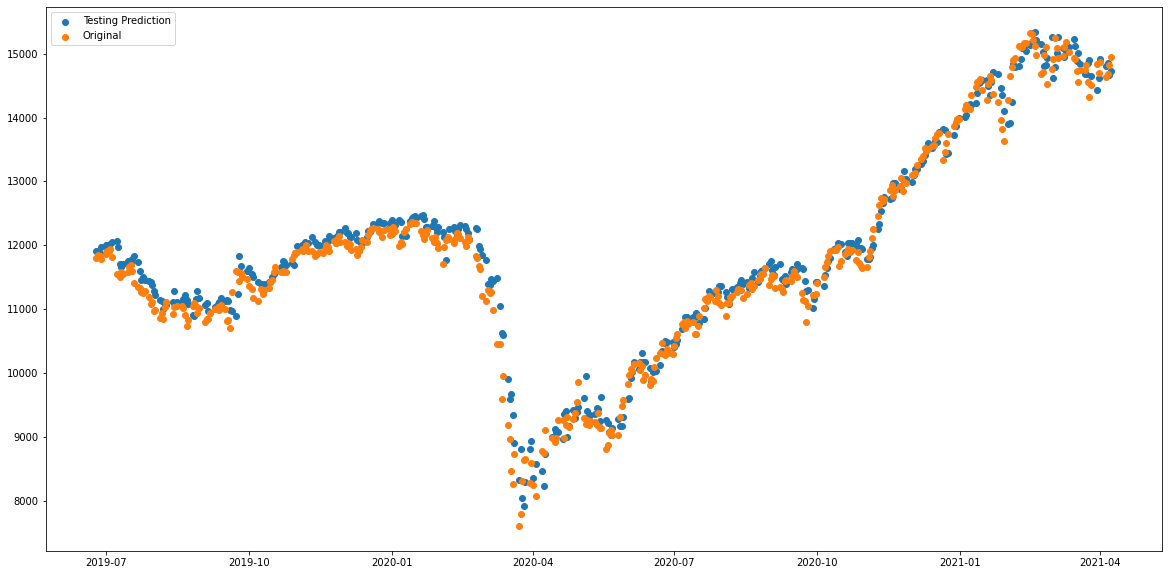

In [57]:
plt.figure(figsize=(20,10))
plt.scatter(index , scaler.inverse_transform(preds) , label='Testing Prediction')
plt.scatter(index , scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,label='Original')
plt.legend()
plt.show()

In [63]:
df['pct_change_original']= df['Original'].pct_change()
df['pct_change_predicted']= df['last 10 years model prediction'].pct_change()

In [64]:
df.head()

,Original,last 10 years model prediction,pct_change_original,pct_change_predicted
Date,,,,
2019-06-25,11796.450195,11920.332031,NaN,NaN
2019-06-26,11847.549805,11834.791992,0.004332,-0.007176
2019-06-27,11841.549805,11886.591797,-0.000506,0.004377
2019-06-28,11788.849609,11978.667969,-0.004450,0.007746
2019-07-01,11865.599609,12000.480469,0.006510,0.001821


740.6484375
-1201.662109375


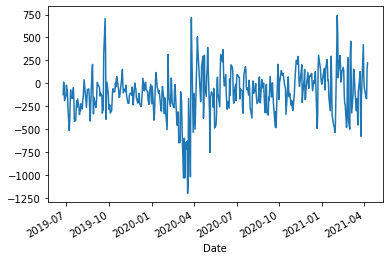

In [94]:
diff = df['Original']- df['last 10 years model prediction']
print(diff.max())
print(diff.min())
diff.plot()
plt.show()

In [91]:
df.loc['2020-03']

,Original,last 10 years model prediction,pct_change_original,pct_change_predicted
Date,,,,
2020-03-02,11132.750000,11776.157227,-0.006160,-0.006419
2020-03-03,11303.299805,11396.615234,0.015320,-0.032230
2020-03-04,11251.000000,11387.416992,-0.004627,-0.000807
2020-03-05,11269.000000,11470.037109,0.001600,0.007255
2020-03-06,10989.450195,11448.619141,-0.024807,-0.001867
2020-03-09,10451.450195,11483.953125,-0.048956,0.003086
2020-03-11,10458.400391,11057.216797,0.000665,-0.037159
2020-03-12,9590.150391,10623.282227,-0.083019,-0.039244
2020-03-13,9955.200195,10604.356445,0.038065,-0.001782


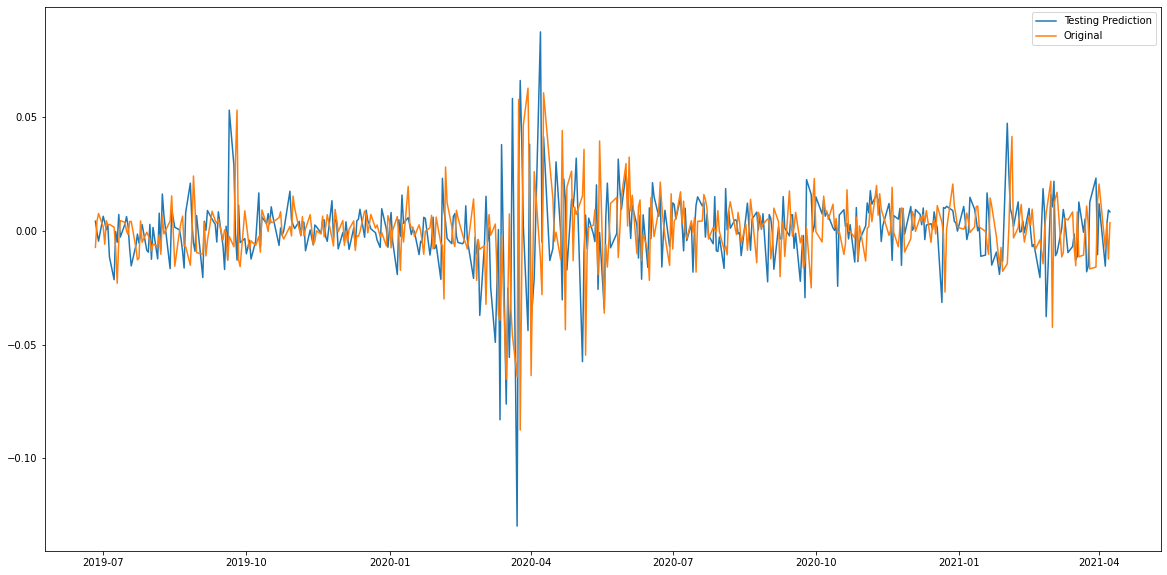

In [67]:
plt.figure(figsize=(20,10))
plt.plot(index , df['pct_change_original'] , label='Testing Prediction')
plt.plot(index , df['pct_change_predicted'] ,label='Original')
plt.legend()
plt.show()

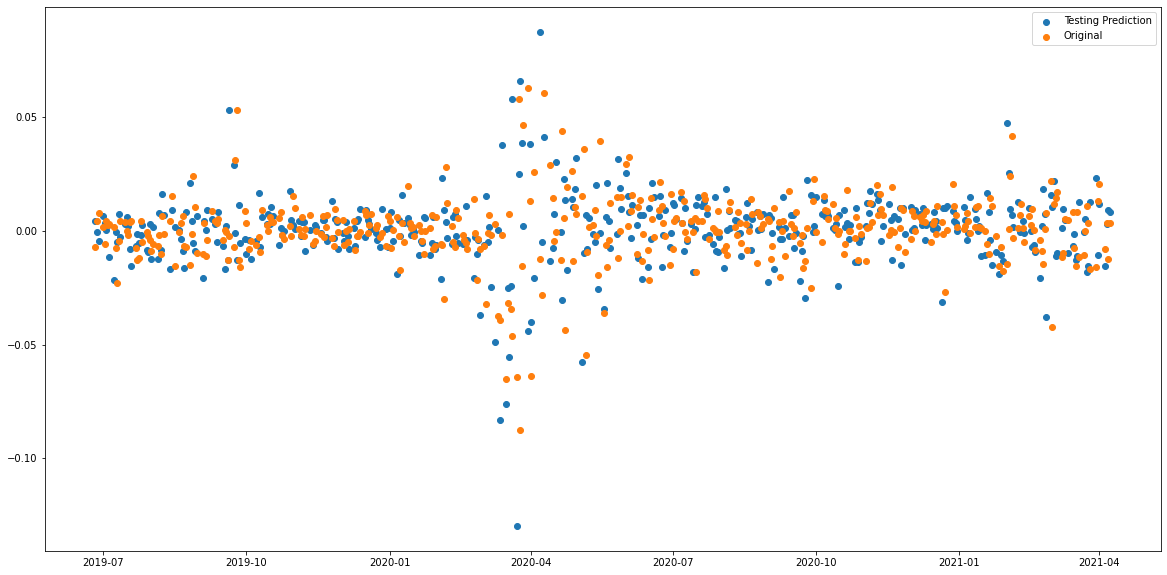

In [68]:
plt.figure(figsize=(20,10))
plt.scatter(index , df['pct_change_original'] , label='Testing Prediction')
plt.scatter(index , df['pct_change_predicted'] ,label='Original')
plt.legend()
plt.show()

In [69]:
np.mean(df['pct_change_original']) - np.mean(df['pct_change_predicted'])

8.238767072753477e-05

## calc

In [70]:
spot_price = np.arange(1990 , 2110 , 10)
spot_price

array([1990, 2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090,
       2100])

In [78]:
strike = 2050
premium = 6.35

In [87]:
for i in range(len(spot_price)):
    out = max(0 , int(spot_price[i] - strike)) - premium
    print(out)

-6.35
-6.35
-6.35
-6.35
-6.35
-6.35
-6.35
3.6500000000000004
13.65
23.65
33.65
43.65
